## Setup environment

In [1]:
import matplotlib.pyplot as plt

from simulators.grid_world.grid_world import Maze, simulate_policy, set_granular_reward, set_normilized_reward, divide_reward_by
from simulators.grid_world.metrics import compute_bad_steps

from simulators.grid_world import HORIZON

grid_type = "simple"
feature_type = "one_hot"
dimensions = 124

# feature_type = "simularity"
# dimensions = 100
sigma = 0.25

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

### Change reward to granular setting

In [2]:
env = set_granular_reward(env)
env = set_normilized_reward(env)
env = divide_reward_by(env, 10)

## LSPI

! Warning ! Stopped before convergence
Grad norm 0.1249896829376564


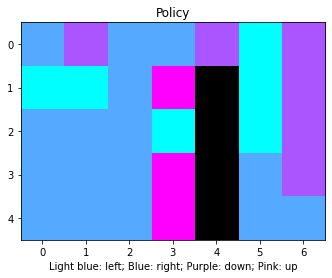

! Warning ! Stopped before convergence
Grad norm 0.12453248260870521


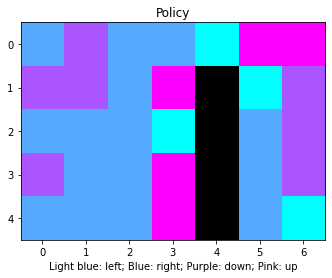

! Warning ! Stopped before convergence
Grad norm 0.12445687557646838


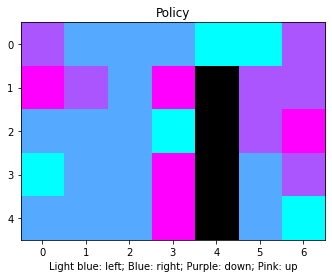

! Warning ! Stopped before convergence
Grad norm 0.12504339952581253


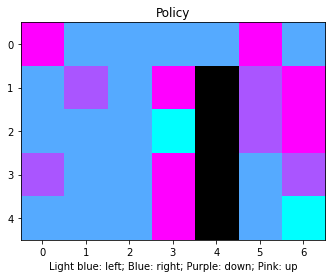

! Warning ! Stopped before convergence
Grad norm 0.12411075175545222


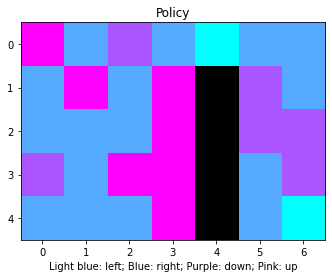

! Warning ! Stopped before convergence
Grad norm 0.12643083399952648


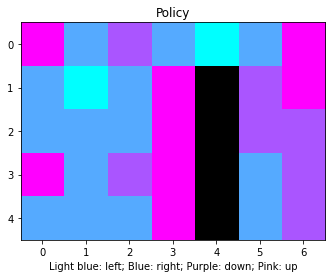

! Warning ! Stopped before convergence
Grad norm 0.12791036111544332


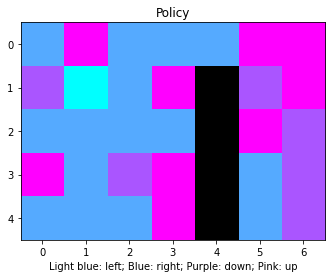

! Warning ! Stopped before convergence
Grad norm 0.12647450067546667


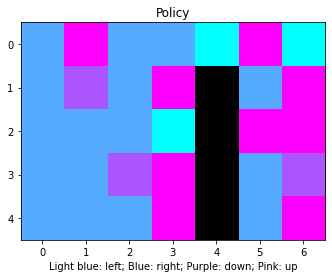

! Warning ! Stopped before convergence
Grad norm 0.12411499189150729


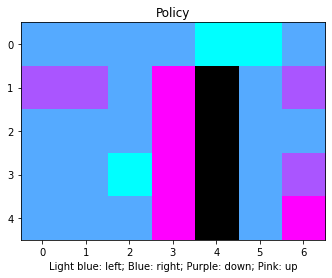

! Warning ! Stopped before convergence
Grad norm 0.12599368851608977


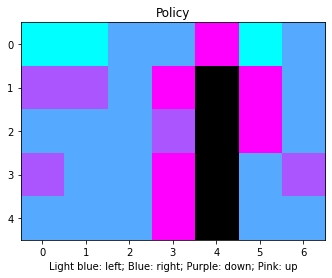

In [21]:
from algorithms.API.lstd import lstd_grid_word

n_expert_samples = 20
n_rl_samples = 100
regularisor = 0.1
regularisor_bellmann = 0.1
max_iteration = 10
epsilon_decay_limit = 0.8
regularisor_expert = 0.5
# expert_loss_name = "penalizer"
expert_loss_name = "large_margin"

show_args = {"show_policy":True, "show_value_function": False, "show_statistics": False}

lstd_Q, lstd_policy, buffer = lstd_grid_word(
    env,
    n_expert_samples,
    n_rl_samples,
    regularisor,
    regularisor_bellmann,
    max_iteration,
    epsilon_decay_limit,
    regularisor_expert,
    expert_loss_name,
    **show_args
)

In [22]:
compute_bad_steps(env, lstd_policy)

13